In [ ]:
#1.	Write down any 3 time series models that can be used for forecasting. (3 points)
#AR Models (autoregressive), MA (moving average) Models, and ARMA (autoregressive moving average) Models.


In [ ]:
#2.	What are some real-world applications of time series forecasting? Name two. (2 points)
#One application would be predicting weather for a given month or period of time. Another application would be forecasting trends in the economy based on previous cycles and data like GDP or Unemployment. 


In [ ]:
#3.	What is the difference between a time series and a panel data set? (2 points)
#A time series data set has N sample units with one variable, but the variable is recorded for T different time stamps. A panel data set has N sample units and P variables, and each variable is recorded on T different time stamps.


In [ ]:
#4.	What is the major difference in how we select training sets in time series machine learning tasks compared to regression/classification tasks? (2 marks)
#The main difference comes from the order in time in which you select your data. In time series machine learning tasks it is important to select the beginning time period as the training set to predict the results in the ending time period. For regression/classification, time doesn’t matter so data points can be selected regardless of its point in time.


In [ ]:
#5.	Define the following terms as relates to time series models:
#a.	Stationarity (1 point)
#A time series with no predictable pattern in the long-term.
#b.	Differencing (1 point)
#Used to make a process stationary.
#c.	White noise (1 point)
#A series of observations that are independently and identically distributed with a mean of 0 and constant variance.
#d.	Random Walk (1 point)
#A series of observations where the current observation equals the previous observation with a random step up and down. 


In [ ]:
#6
#a.	Interpret the following equation terms in the above equation: c,  ,  ,  ,   (5 points)
#c, is the intercept, epsilon is the error term, phi  is the autoregression coefficient,  theta is the MA coefficient, and epsilon t-1 is the lag of MA.
#b.	Can you tell from the above equation whether the time series has been differenced? Explain why or why not. (1 point)
#You can tell the model was differed from the epsilons.
#c.	What is the Autoregressive (AR) order in the above equation? How about the Moving Average (MA) order (2 points)
#The Autoregressive order is AR 3, 2, 1 while the Moving Average order is MA 4, 3, 2, 1. You can see this in the equation as the values above the summations. 
#d.	How do you determine the AR and MA order? How do you know how many lags to include in your model? (2 points)
#The order comes from the ACF and PACF plots using the statistically significant lines. The PACF plot is for an AR model and an ACF plot for a MA model in order to decide how many lags to include.


In [50]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import statsmodels.api as sm # v 0.13.5
import matplotlib.pyplot as plt # 3.6.3

import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.5

from statsmodels.tsa.stattools import adfuller # v 0.13.5
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.5
from statsmodels.tsa.arima_model import ARIMA # v 0.13.5

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


ModuleNotFoundError: No module named 'pmdarima'

In [51]:
#1

df = pd.read_csv ("C:/Users/btomi/Downloads/Electric_Production.csv")

df.shape, df.columns, df.dtypes

#This provides EDA. I can see that the it says DATE has dtype = object, so this would have to be changed. 

((397, 2),
 Index(['DATE', 'IPG2211A2N'], dtype='object'),
 DATE           object
 IPG2211A2N    float64
 dtype: object)

In [52]:
df.head(), df.tail()

#More analysis 

(       DATE  IPG2211A2N
 0  1/1/1985     72.5052
 1  2/1/1985     70.6720
 2  3/1/1985     62.4502
 3  4/1/1985     57.4714
 4  5/1/1985     55.3151,
           DATE  IPG2211A2N
 392   9/1/2017     98.6154
 393  10/1/2017     93.6137
 394  11/1/2017     97.3359
 395  12/1/2017    114.7212
 396   1/1/2018    129.4048)

In [53]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

#Now that DATE has been changed from object, the data set seems normal. 

DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object

In [54]:
#Tests 

def adfuller_test(timeseries):
    result=adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [55]:
for i in df.columns:
    print(i), adfuller_test(df[i])
    print()
    
# The p-value of 0.18 tells us the data is not statistically significant.

DATE
ADF Test Statistic : -0.14017905755795687
p-value : 0.9452865588327847
#Lags Used : 12
Number of Observations : 384
weak evidence against null hypothesis,indicating it is non-stationary 

IPG2211A2N
ADF Test Statistic : -2.25699035004724
p-value : 0.18621469116586942
#Lags Used : 15
Number of Observations : 381
weak evidence against null hypothesis,indicating it is non-stationary 



In [8]:
for i in df.columns:
    print (i)
    print()
    print (stattools.kpss(df[i], regression='ct'))
    print ()

DATE

(0.017153236079836095, 0.1, 7, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

IPG2211A2N

(0.5051030832418684, 0.01, 16, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})



C:\Users\btomi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\btomi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [21]:
df2 = df['IPG2211A2N']
df2 = pd.DataFrame(df2)

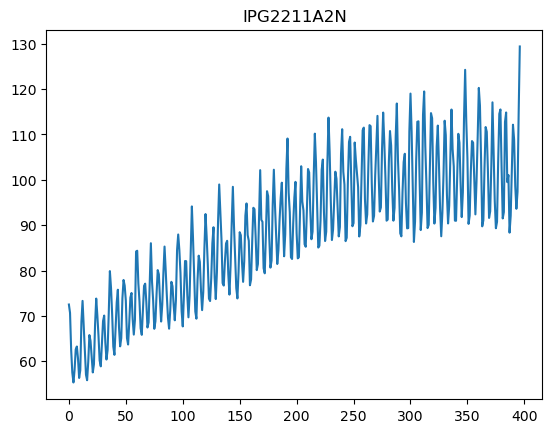

In [22]:
df2["IPG2211A2N"].plot(fig=plt.figure(i))
plt.title("IPG2211A2N")

plt.show()

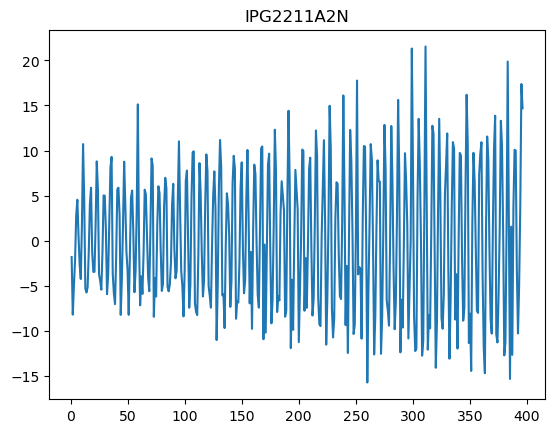

In [23]:
df2["IPG2211A2N"].diff().plot(fig=plt.figure(i))
plt.title("IPG2211A2N")

plt.show() 

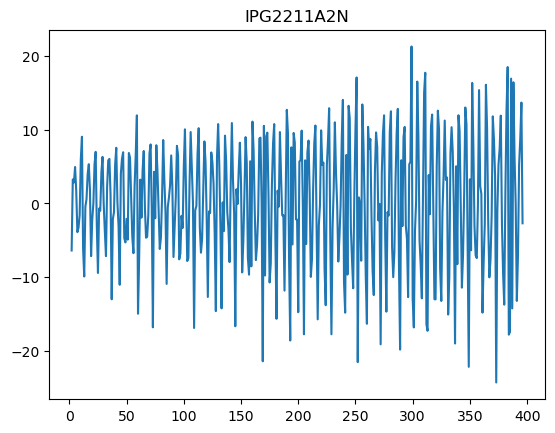

In [24]:
df2["IPG2211A2N"].diff().diff().plot(fig=plt.figure(i))
plt.title("IPG2211A2N")

plt.show() 

In [9]:
def acf_pacf (series)-> plt.plot:
    return plot_acf(series), plot_pacf(series)

DATE

IPG2211A2N


C:\Users\btomi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


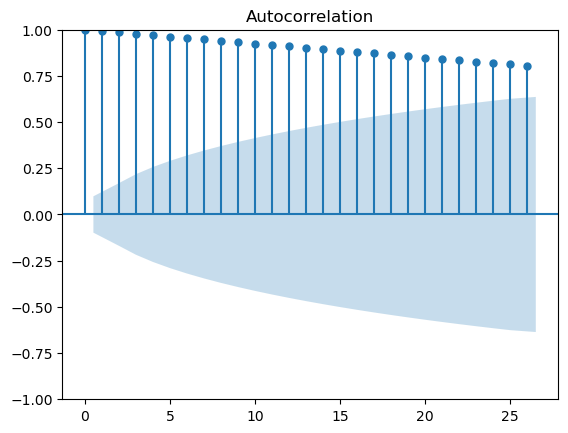

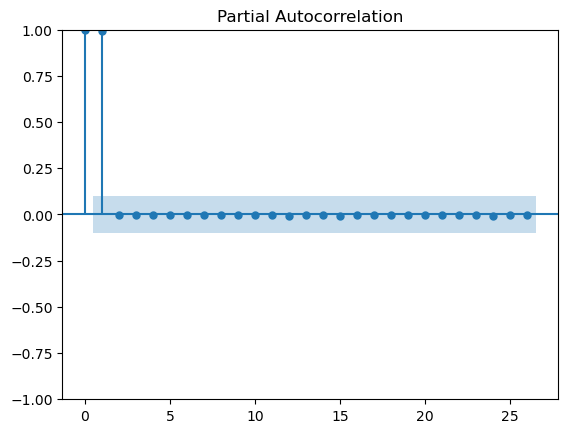

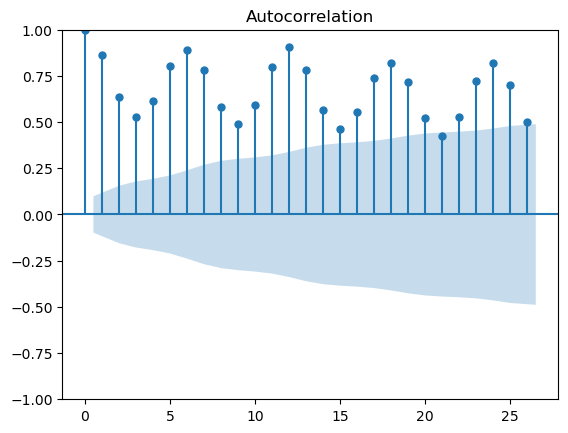

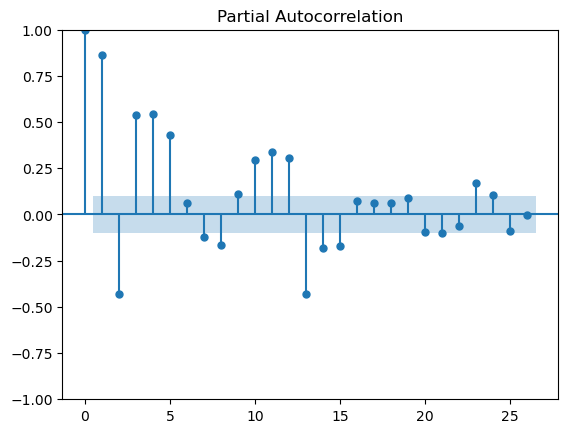

In [10]:
for i in df.columns:
    print(i)
    acf_pacf(df[i])
    print()
    
    
#Here are the graphs for the variable.

In [34]:
#To find order 

def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [35]:
for i in df2:
    print(i)
    arimamodel(df2[i])
    print()

IPG2211A2N


NameError: name 'pm' is not defined

In [39]:
model = sm.tsa.arima.ARIMA(df['IPG2211A2N'].head(int(0.7*len(df))), order=(2, 0, 1))
results = model.fit()
results.summary()

C:\Users\btomi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  277
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -866.322
Date:                Tue, 03 Oct 2023   AIC                           1742.644
Time:                        20:40:59   BIC                           1760.764
Sample:                             0   HQIC                          1749.915
                                - 277                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.3493      2.340     35.623      0.000      78.764      87.935
ar.L1          1.0093      0.098     10.252      0.000       0.816       1.202
ar.L2         -0.2316      0.100     -2.323      0.020      -0.427      -0.036
ma.L1          0.4722      0.084      5.619      0.000       0.307       0.637
sigma2        30.2279      2.843     10.631      0.000      24.655      35.801
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.45   Prob(JB):                         0.51
Heteroskedasticity (H):               2.24   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
df['IPG2211A2N_forecast']=results.predict(start = int(0.7*len(df))+1, end=len(df) , dynamic=True)

C:\Users\btomi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

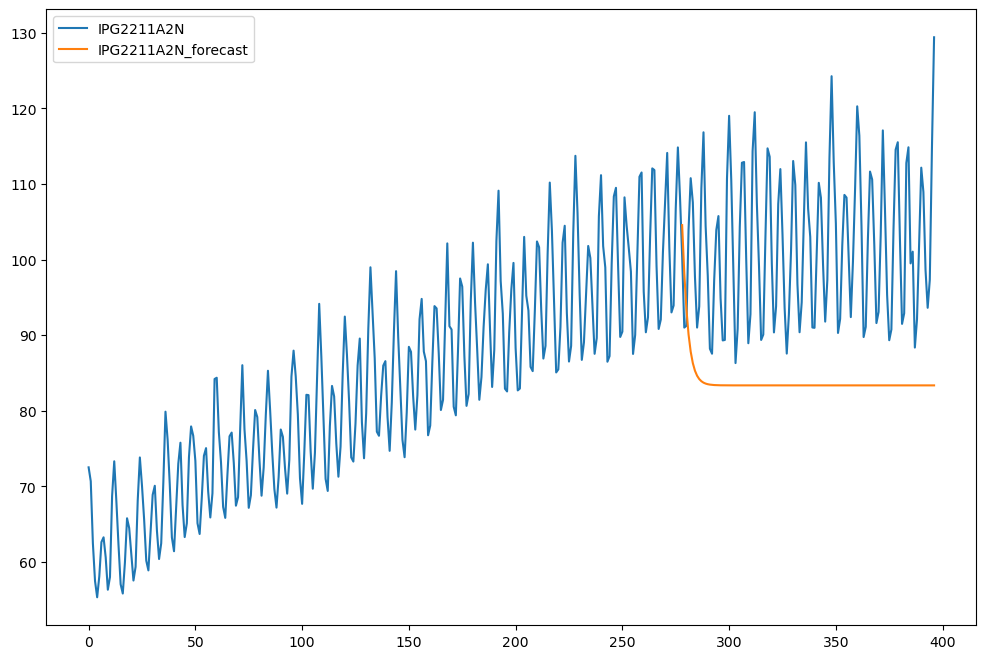

In [45]:
df[['IPG2211A2N','IPG2211A2N_forecast']].plot(figsize=(12,8))

In [46]:
mean_squared_error(df['IPG2211A2N_forecast'].tail(int(0.3*len(df))),df['IPG2211A2N'].tail(int(0.3*len(df))))

432.0257342239654

In [49]:
mean_absolute_error(df['IPG2211A2N_forecast'].tail(int(0.3*len(df))),df['IPG2211A2N'].tail(int(0.3*len(df))))

18.31441962799453

In [ ]:
#Clearly my MSE is very high and my MAS is high as well. This tells me that I have not constructed a good model as it is not a good fit. 